In [108]:

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN 
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime=pd.read_csv('C:/Users/AJAY/Downloads/crime_data.csv')

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()
crime1=normalize.fit_transform(crime.iloc[:,1:].to_numpy())
crime2=pd.DataFrame(crime1,columns=crime.columns[1:])
crime2

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


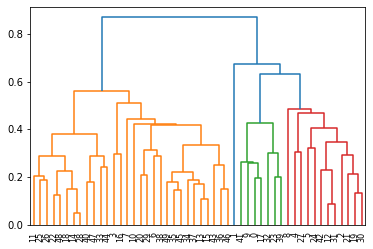

In [8]:
dendrogram=sch.dendrogram(sch.linkage(crime2,method='average'))

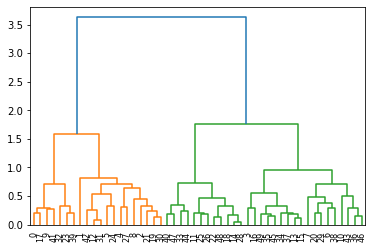

In [9]:
dendrogram=sch.dendrogram(sch.linkage(crime2,method='ward'))

In [73]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [74]:
y_hc=hc.fit_predict(crime2)
cluster=pd.DataFrame(y_hc,columns=['Clusters'])

In [75]:
cluster

,Clusters
0,3
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,3


In [76]:
crime2['h_clusterid']=cluster

In [77]:
crime2.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
24,0.493976,0.455479,0.644068,0.540052,0
19,0.632530,0.873288,0.593220,0.529716,0
30,0.638554,0.821918,0.644068,0.640827,0
31,0.620482,0.715753,0.915254,0.485788,0
12,0.578313,0.698630,0.864407,0.431525,0
27,0.686747,0.708904,0.830508,1.000000,0
42,0.716867,0.534247,0.813559,0.470284,0
8,0.879518,0.993151,0.813559,0.635659,0
21,0.680723,0.719178,0.711864,0.718346,0
5,0.427711,0.544521,0.779661,0.811370,0


In [78]:
crime

,Assault,UrbanPop,Rape
0,236,58,21.2
1,263,48,44.5
2,294,80,31.0
3,190,50,19.5
4,276,91,40.6
5,204,78,38.7
6,110,77,11.1
7,238,72,15.8
8,335,80,31.9
9,211,60,25.8


# Kmeans

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
crime3=scaler.fit_transform(crime.iloc[:,1:])

In [80]:
crime3

array([[-0.52619514, -0.00345116],
       [-1.22406668,  2.50942392],
       [ 1.00912225,  1.05346626],
       [-1.08449238, -0.18679398],
       [ 1.77678094,  2.08881393],
       [ 0.86954794,  1.88390137],
       [ 0.79976079, -1.09272319],
       [ 0.45082502, -0.58583422],
       [ 1.00912225,  1.1505301 ],
       [-0.38662083,  0.49265293],
       [ 1.21848371, -0.11129987],
       [-0.80534376, -0.75839217],
       [ 1.21848371,  0.29852525],
       [-0.03768506, -0.0250209 ],
       [-0.5959823 , -1.07115345],
       [ 0.03210209, -0.34856705],
       [-0.94491807, -0.53190987],
       [ 0.03210209,  0.10439756],
       [-1.01470522, -1.44862395],
       [ 0.10188925,  0.70835037],
       [ 1.35805802, -0.53190987],
       [ 0.59039932,  1.49564599],
       [ 0.03210209, -0.68289807],
       [-1.5032153 , -0.44563089],
       [ 0.31125071,  0.75148985],
       [-0.87513091, -0.521125  ],
       [-0.24704653, -0.51034012],
       [ 1.0789094 ,  2.671197  ],
       [-0.66576945,

In [81]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(crime3)

KMeans(n_clusters=4, random_state=0)

In [82]:
kmeans.inertia_

26.69261643706141

In [83]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime3)
    wcss.append(kmeans.inertia_)

C:\Users\AJAY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


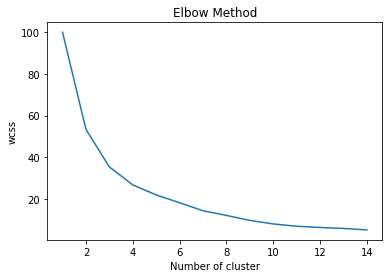

In [84]:
plt.plot(range(1,15),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

In [87]:
cluster_crime=KMeans(4,random_state=32)
cluster_crime.fit(crime3)

KMeans(n_clusters=4, random_state=32)

In [88]:
cluster_crime.labels_

array([1, 3, 3, 2, 3, 3, 0, 1, 3, 1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 1, 0, 3,
       1, 2, 1, 2, 1, 3, 2, 0, 3, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0,
       2, 1, 1, 2, 1, 1])

In [89]:
cluster_crime.cluster_centers_

array([[ 1.18359013e+00, -1.91107925e-01],
       [ 1.08557795e-03, -3.82024118e-02],
       [-1.23403628e+00, -8.16168268e-01],
       [ 6.77633267e-01,  1.75313480e+00]])

In [90]:
crime4=pd.DataFrame(cluster_crime.labels_,columns=['cluster'])
crime4

,cluster
0,1
1,3
2,3
3,2
4,3
5,3
6,0
7,1
8,3
9,1


In [91]:
crime5=pd.concat([crime,crime4],axis=1)
crime5

,Assault,UrbanPop,Rape,cluster
0,236,58,21.2,1
1,263,48,44.5,3
2,294,80,31.0,3
3,190,50,19.5,2
4,276,91,40.6,3
5,204,78,38.7,3
6,110,77,11.1,0
7,238,72,15.8,1
8,335,80,31.9,3
9,211,60,25.8,1


# DBSCAN

In [92]:
crime

,Assault,UrbanPop,Rape
0,236,58,21.2
1,263,48,44.5
2,294,80,31.0
3,190,50,19.5
4,276,91,40.6
5,204,78,38.7
6,110,77,11.1
7,238,72,15.8
8,335,80,31.9
9,211,60,25.8


In [93]:
crime=crime.iloc[:,1:5]
crime

,UrbanPop,Rape
0,58,21.2
1,48,44.5
2,80,31.0
3,50,19.5
4,91,40.6
5,78,38.7
6,77,11.1
7,72,15.8
8,80,31.9
9,60,25.8


In [94]:
array=crime.values
array

array([[58. , 21.2],
       [48. , 44.5],
       [80. , 31. ],
       [50. , 19.5],
       [91. , 40.6],
       [78. , 38.7],
       [77. , 11.1],
       [72. , 15.8],
       [80. , 31.9],
       [60. , 25.8],
       [83. , 20.2],
       [54. , 14.2],
       [83. , 24. ],
       [65. , 21. ],
       [57. , 11.3],
       [66. , 18. ],
       [52. , 16.3],
       [66. , 22.2],
       [51. ,  7.8],
       [67. , 27.8],
       [85. , 16.3],
       [74. , 35.1],
       [66. , 14.9],
       [44. , 17.1],
       [70. , 28.2],
       [53. , 16.4],
       [62. , 16.5],
       [81. , 46. ],
       [56. ,  9.5],
       [89. , 18.8],
       [70. , 32.1],
       [86. , 26.1],
       [45. , 16.1],
       [44. ,  7.3],
       [75. , 21.4],
       [68. , 20. ],
       [67. , 29.3],
       [72. , 14.9],
       [87. ,  8.3],
       [48. , 22.5],
       [45. , 12.8],
       [59. , 26.9],
       [80. , 25.5],
       [80. , 22.9],
       [32. , 11.2],
       [63. , 20.7],
       [73. , 26.2],
       [39. ,

In [95]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)

In [96]:
X

array([[-0.52619514, -0.00345116],
       [-1.22406668,  2.50942392],
       [ 1.00912225,  1.05346626],
       [-1.08449238, -0.18679398],
       [ 1.77678094,  2.08881393],
       [ 0.86954794,  1.88390137],
       [ 0.79976079, -1.09272319],
       [ 0.45082502, -0.58583422],
       [ 1.00912225,  1.1505301 ],
       [-0.38662083,  0.49265293],
       [ 1.21848371, -0.11129987],
       [-0.80534376, -0.75839217],
       [ 1.21848371,  0.29852525],
       [-0.03768506, -0.0250209 ],
       [-0.5959823 , -1.07115345],
       [ 0.03210209, -0.34856705],
       [-0.94491807, -0.53190987],
       [ 0.03210209,  0.10439756],
       [-1.01470522, -1.44862395],
       [ 0.10188925,  0.70835037],
       [ 1.35805802, -0.53190987],
       [ 0.59039932,  1.49564599],
       [ 0.03210209, -0.68289807],
       [-1.5032153 , -0.44563089],
       [ 0.31125071,  0.75148985],
       [-0.87513091, -0.521125  ],
       [-0.24704653, -0.51034012],
       [ 1.0789094 ,  2.671197  ],
       [-0.66576945,

In [97]:
min_sample=9
dbscan=DBSCAN(eps=0.75,min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.75, min_samples=4)

In [98]:
dbscan.labels_

array([ 0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [99]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,0
3,0
4,-1
5,0
6,0
7,0
8,0
9,0


In [100]:
cl.count()

cluster    50
dtype: int64

In [66]:
clustered=pd.concat([crime,cl],axis=1)
clustered

,Assault,UrbanPop,Rape,cluster
0,236,58,21.2,0
1,263,48,44.5,-1
2,294,80,31.0,2
3,190,50,19.5,-1
4,276,91,40.6,-1
5,204,78,38.7,-1
6,110,77,11.1,1
7,238,72,15.8,-1
8,335,80,31.9,-1
9,211,60,25.8,0


In [101]:
clustered[clustered['cluster']==-1]

,Assault,UrbanPop,Rape,cluster
1,263,48,44.5,-1
3,190,50,19.5,-1
4,276,91,40.6,-1
5,204,78,38.7,-1
7,238,72,15.8,-1
8,335,80,31.9,-1
10,46,83,20.2,-1
12,249,83,24.0,-1
20,149,85,16.3,-1
23,259,44,17.1,-1


In [102]:
clustered

,Assault,UrbanPop,Rape,cluster
0,236,58,21.2,0
1,263,48,44.5,-1
2,294,80,31.0,2
3,190,50,19.5,-1
4,276,91,40.6,-1
5,204,78,38.7,-1
6,110,77,11.1,1
7,238,72,15.8,-1
8,335,80,31.9,-1
9,211,60,25.8,0


In [103]:
clustered.mean()

Assault     170.760
UrbanPop     65.540
Rape         21.232
cluster       0.320
dtype: float64

In [104]:
clustered.sort_values('cluster')

,Assault,UrbanPop,Rape,cluster
42,201,80,25.5,-1
29,159,89,18.8,-1
27,252,81,46.0,-1
23,259,44,17.1,-1
38,174,87,8.3,-1
20,149,85,16.3,-1
39,279,48,22.5,-1
32,337,45,16.1,-1
12,249,83,24.0,-1
10,46,83,20.2,-1


In [105]:
X.shape

(50, 2)

In [106]:
min_sample

9